<a href="https://colab.research.google.com/github/SIDDU-9494/ML-Projects/blob/main/EmployeeBurnout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the Dataset**

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/EmployeeBurnout/train.csv")
data

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52


# **Checking the total columns in the dataset**

In [ ]:
data.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

# **Describing our data**

In [ ]:
data.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


# **Let us check our dataset containing what type of data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


# **Now let us see how many null values are presented in our data**

In [ ]:
data.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

# **Changing our object-type data into numerical order**

In [ ]:
data['Gender']=data['Gender'].replace({'Female':0,'Male':1})

In [ ]:
data['Company Type']=data['Company Type'].replace({'Service':0,'Product':1})

In [ ]:
data['WFH Setup Available']=data['WFH Setup Available'].replace({'Yes':0,'No':1})

# **Dropping the employee id column from the data because it's not that much necessary**

In [ ]:
data.drop('Employee ID',axis=1)

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2008-09-30,0,0,1,2.0,3.0,3.8,0.16
1,2008-11-30,1,0,0,1.0,2.0,5.0,0.36
2,2008-03-10,0,1,0,2.0,NaN,5.8,0.49
3,2008-11-03,1,0,0,1.0,1.0,2.6,0.20
4,2008-07-24,0,0,1,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...
22745,2008-12-30,0,0,1,1.0,3.0,NaN,0.41
22746,2008-01-19,0,1,0,3.0,6.0,6.7,0.59
22747,2008-11-05,1,0,0,3.0,7.0,NaN,0.72
22748,2008-01-10,0,0,1,2.0,5.0,5.9,0.52


**Dealing the columns containing Null values**

In [ ]:
data['Resource Allocation'].fillna(data['Resource Allocation'].mean(),inplace=True)
data['Mental Fatigue Score'].fillna(data['Mental Fatigue Score'].mean(),inplace=True)
data['Burn Rate'].fillna(data['Burn Rate'].mean(),inplace=True)

# **The null values are cleaned**

In [ ]:
data.isna().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

# **Let us split the data into Labels as X and targets as y**

In [ ]:
X=data[['Gender', 'Company Type','WFH Setup Available', 'Designation', 'Resource Allocation','Mental Fatigue Score']]
y=data['Burn Rate']

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(0.95)
x_pca=pca.fit_transform(X)

# **Random Forest Regressor**



In [ ]:
from sklearn.model_selection import train_test_split
X_train_pca,X_test,y_train,y_test=train_test_split(x_pca,y,train_size=0.7,random_state=10)
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=10)
rf.fit(X_train_pca,y_train)

RandomForestRegressor(random_state=10)

In [ ]:
from sklearn.metrics import r2_score,accuracy_score
pre=rf.predict(X_test)
r2_score(y_test,pre)

0.8435909905342727

In [ ]:
X_train_pca.shape,y_train.shape,X_test.shape,y_test.shape

((15924, 4), (15924,), (6826, 4), (6826,))

# **Linear Regression**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=10)
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
pred=model.predict(X_test)

In [ ]:
r2_score(y_test,pred)

0.8336672100757222

****

# **Decision Tree Regressor**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Xtrain = scaler.fit_transform(X_train)
scaled_x_test = scaler.fit_transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
modl=DecisionTreeRegressor()

In [ ]:
modl.fit(scaled_Xtrain,y_train)

DecisionTreeRegressor()

In [ ]:
pr=model.predict(scaled_x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pr)


0.006156480253929918

# **Visualization**

<ipython-input-51-dc537b715aae>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)


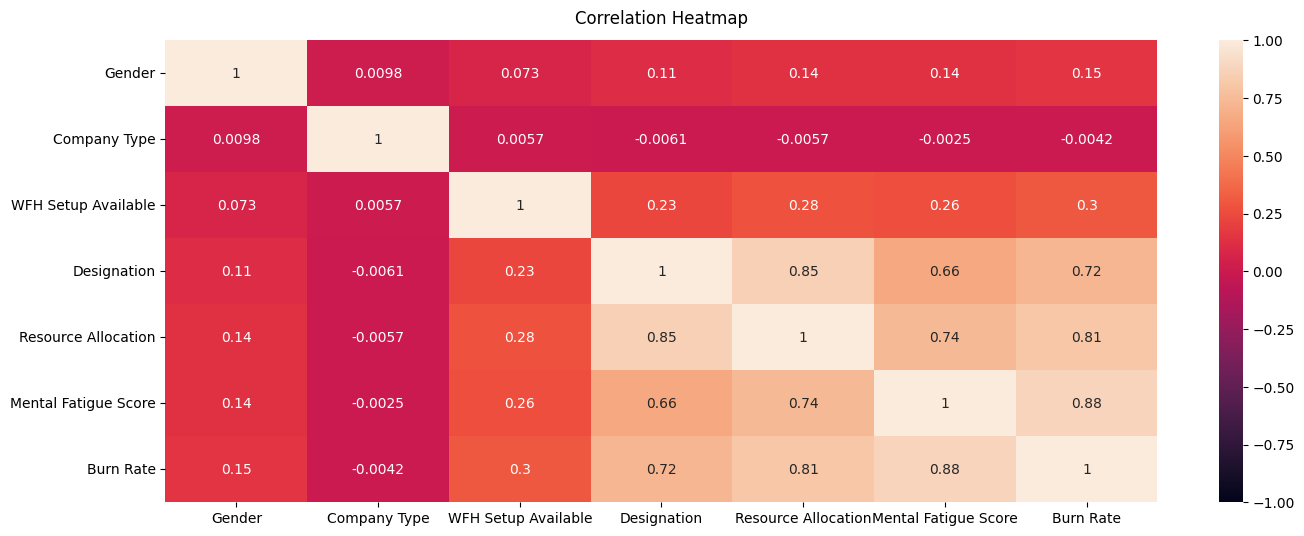

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.savefig("correlation_heatmap.png")